In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
from pandas.tseries.offsets import BDay

In [3]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [4]:
df = pd.read_csv('Gold_Price_Dataset.csv')
df.head()

,Name,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,US dollar.1,...,Vietnamese dong,Egyptian pound,Korean won,Euro.1,Russian ruble,US dollar.2,South African rand,Chinese renmimbi.1,Canadian dollar.1,Australian dollar
0,29-12-1978,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,226.0,...,NaN,NaN,NaN,137.1,NaN,226.0,NaN,NaN,NaN,NaN
1,01-01-1979,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,226.0,...,NaN,NaN,NaN,137.1,NaN,226.0,NaN,NaN,NaN,NaN
2,02-01-1979,226.8,137.3,43164.9,111.5,263.7,359.6,1792.9,NaN,226.8,...,NaN,NaN,107470.0,137.3,NaN,226.8,194.6,NaN,263.7,193.6
3,03-01-1979,218.6,134.0,43717.9,108.0,264.4,365.9,1802.2,NaN,218.6,...,NaN,NaN,108027.4,134.0,NaN,218.6,192.2,NaN,264.4,193.0
4,04-01-1979,223.2,136.8,43674.9,110.7,264.1,366.4,1811.7,NaN,223.2,...,NaN,NaN,108602.5,136.8,NaN,223.2,193.0,NaN,264.1,194.6


In [5]:
df.tail()

,Name,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,US dollar.1,...,Vietnamese dong,Egyptian pound,Korean won,Euro.1,Russian ruble,US dollar.2,South African rand,Chinese renmimbi.1,Canadian dollar.1,Australian dollar
10896,05-10-2020,1909.6,1619.3,201739.7,1471.4,2533.1,1747.1,139954.6,13005.5,1909.6,...,44310360.7,30057.1,2221724.1,1619.3,149390.4,1909.6,31453.5,13005.5,2533.1,2655.7
10897,06-10-2020,1913.4,1622.7,202083.7,1475.0,2537.9,1749.0,140560.7,13031.4,1913.4,...,44405228.2,30088.2,2221457.3,1622.7,149144.9,1913.4,31570.0,13031.4,2537.9,2671.4
10898,07-10-2020,1884.5,1602.3,199804.1,1461.0,2503.7,1728.2,138176.2,12834.6,1884.5,...,43730764.8,29551.3,2182533.5,1602.3,147410.3,1884.5,31373.4,12834.6,2503.7,2640.1
10899,08-10-2020,1887.5,1606.5,200116.9,1459.9,2496.1,1732.2,138241.5,12854.7,1887.5,...,43773739.3,29651.8,2176701.7,1606.5,146305.7,1887.5,31298.7,12854.7,2496.1,2637.0
10900,09-10-2020,1923.3,1627.9,203201.0,1479.7,2526.1,1753.4,140676.1,12912.1,1923.3,...,44605937.3,30214.3,2217988.1,1627.9,147532.5,1923.3,31601.4,12912.1,2526.1,2661.0


In [6]:
time = pd.date_range(start='12/29/1978',periods=10901,freq=BDay())
df['time_stamp'] = pd.DataFrame(time)
df.drop(['Name'],axis=1,inplace=True)
df = df.set_index('time_stamp')

In [7]:
df = df[['US dollar']]

In [8]:
df.shape

(10901, 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10901 entries, 1978-12-29 to 2020-10-09
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   US dollar  10901 non-null  float64
dtypes: float64(1)
memory usage: 170.3 KB


In [10]:
df.isnull().sum()

US dollar    0
dtype: int64

In [11]:
df.columns=['USD']

In [12]:
df

,USD
time_stamp,
1978-12-29,226.0
1979-01-01,226.0
1979-01-02,226.8
1979-01-03,218.6
1979-01-04,223.2
...,...
2020-10-05,1909.6
2020-10-06,1913.4
2020-10-07,1884.5


In [13]:
df.head()

,USD
time_stamp,
1978-12-29,226.0
1979-01-01,226.0
1979-01-02,226.8
1979-01-03,218.6
1979-01-04,223.2


In [14]:
df.tail()

,USD
time_stamp,
2020-10-05,1909.6
2020-10-06,1913.4
2020-10-07,1884.5
2020-10-08,1887.5
2020-10-09,1923.3


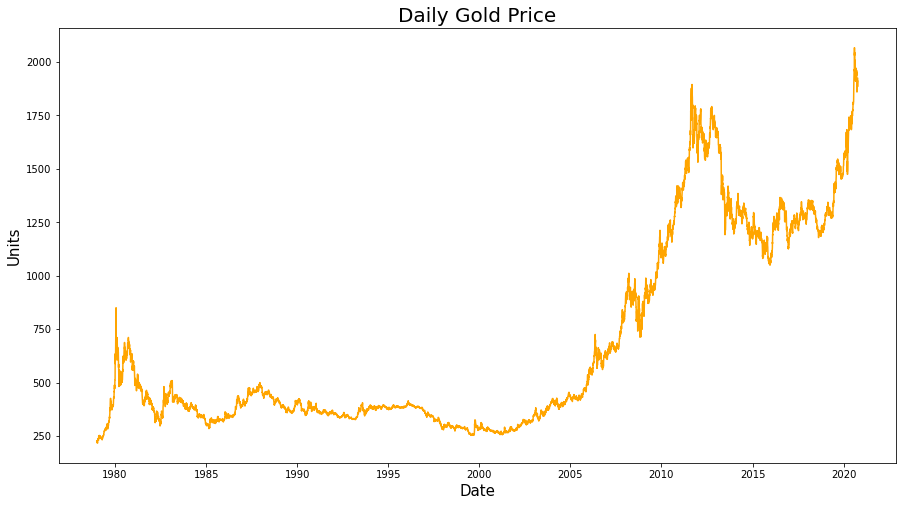

In [15]:
plt.plot(df,color='orange')
plt.title('Daily Gold Price',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Units',fontsize=15)
plt.show()

In [16]:
plt.rcParams['figure.figsize'] = [15,8]

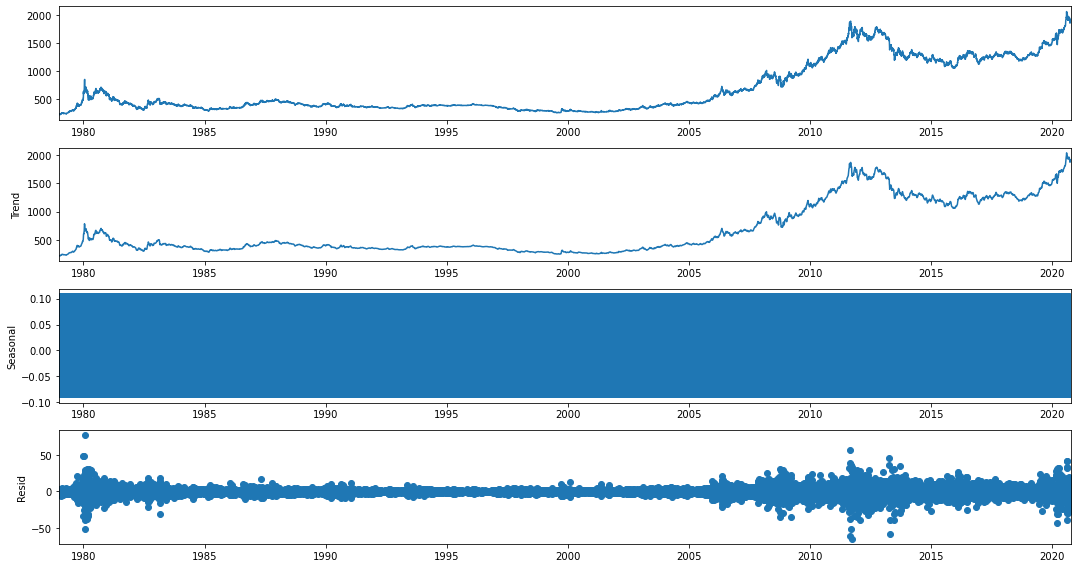

In [29]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

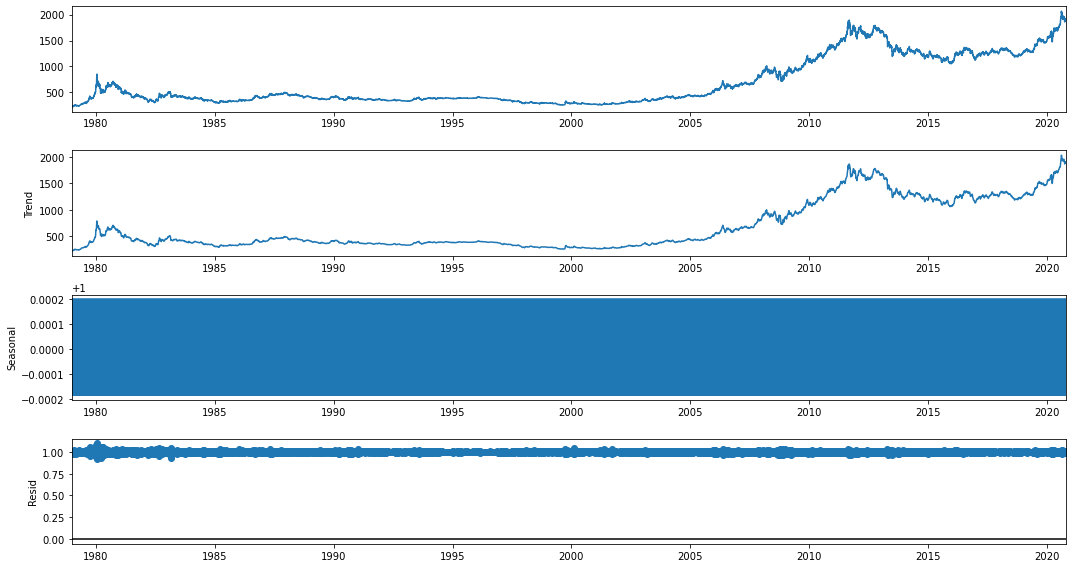

In [30]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

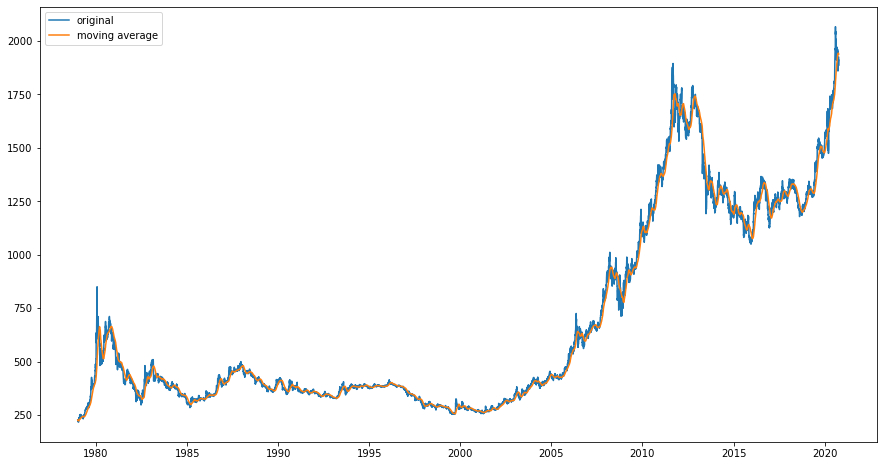

In [33]:
plt.plot(df,label='original')
plt.plot(df.rolling(50,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [21]:
# Model building - Exponential Smoothing Techniques

In [17]:
train = df.iloc[:9801]
test = df.iloc[9801:]

In [18]:
train.tail()

,USD
time_stamp,
2016-07-18,1334.7
2016-07-19,1330.9
2016-07-20,1315.9
2016-07-21,1321.2
2016-07-22,1320.8


In [19]:
test.head()

,USD
time_stamp,
2016-07-25,1313.2
2016-07-26,1323.0
2016-07-27,1329.0
2016-07-28,1341.8
2016-07-29,1342.0


In [20]:
len(train)

9801

In [21]:
len(test)

1100

##### Simple Exponential Smoothing

In [22]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(optimized=True)
SES_model.summary()

Dep. Variable:,USD,No. Observations:,9801
Model:,SimpleExpSmoothing,SSE,781930.226
Optimized:,True,AIC,42925.334
Trend:,None,BIC,42939.714
Seasonal:,None,AICC,42925.338
Seasonal Periods:,None,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,13:41:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9783611,alpha,True
initial_level,225.99985,l.0,True


In [23]:
SES_predict = SES_model.forecast(len(test))

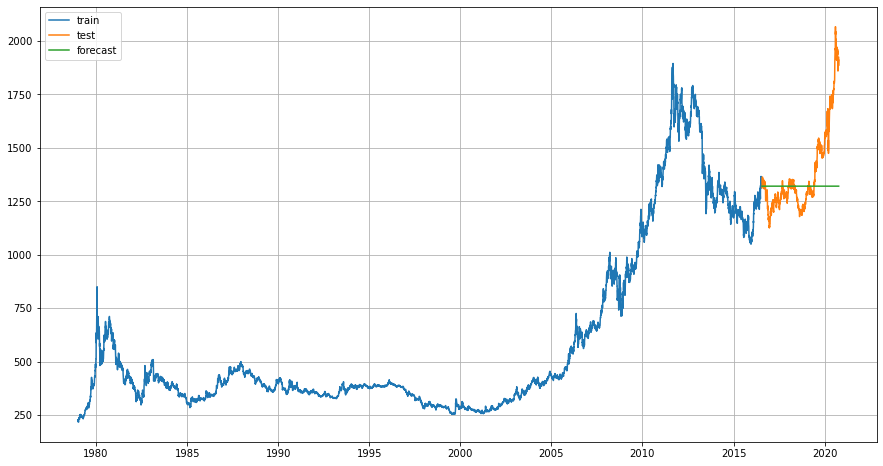

In [24]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [25]:
print("MAE:",MAE(test['USD'],SES_predict))
print("MAPE:",MAPE(test['USD'],SES_predict))

MAE: 135.66191912535106
MAPE: 8.81405300143756


##### Double Exponential Smoothing

In [26]:
DES = Holt(train,exponential=True,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=1,
                   smoothing_trend=0.00001436)
DES_model.summary()

Dep. Variable:,USD,No. Observations:,9801
Model:,Holt,SSE,782254.806
Optimized:,True,AIC,42933.402
Trend:,Multiplicative,BIC,42962.162
Seasonal:,None,AICC,42933.410
Seasonal Periods:,None,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,13:42:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
smoothing_trend,1.436e-05,beta,False


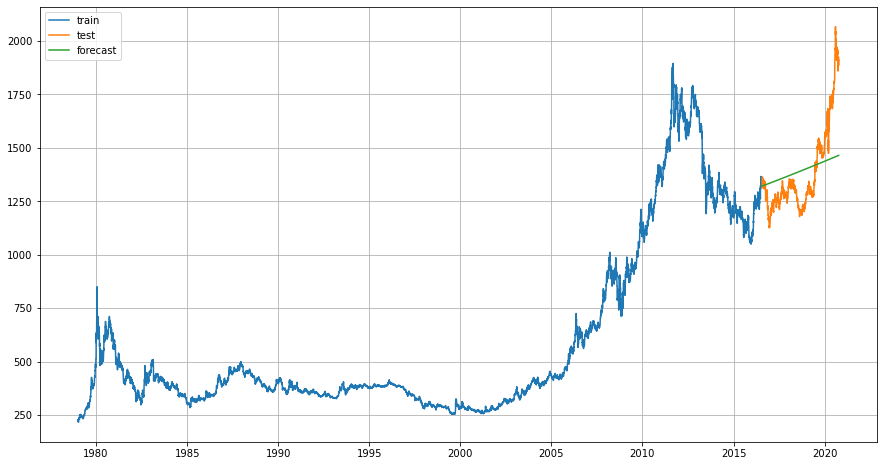

In [28]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [29]:
print("MAE:",MAE(test['USD'],DES_predict))
print("MAPE:",MAPE(test['USD'],DES_predict))

MAE: 129.47004173360222
MAPE: 8.98518332581263


##### Triple Exponential Smoothing

In [30]:
TES = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
TES_model = TES.fit(smoothing_level=0.9596429,
                   smoothing_trend=0.0000952729,
                   smoothing_seasonal=0.090714)
TES_model.summary()

Dep. Variable:,USD,No. Observations:,9801
Model:,ExponentialSmoothing,SSE,828736.106
Optimized:,True,AIC,43509.127
Trend:,Multiplicative,BIC,43573.840
Seasonal:,Multiplicative,AICC,43509.154
Seasonal Periods:,5,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,13:43:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9596429,alpha,False
smoothing_trend,9.5273e-05,beta,False


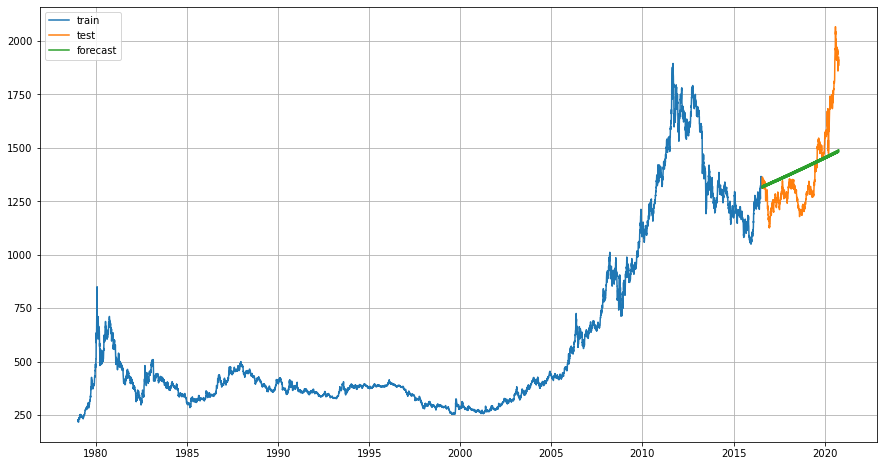

In [31]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [32]:
print("MAE:",MAE(test['USD'],TES_predict))
print("MAPE:",MAPE(test['USD'],TES_predict))

MAE: 127.5726145907324
MAPE: 8.9124288550578


##### ACF and PACF plots

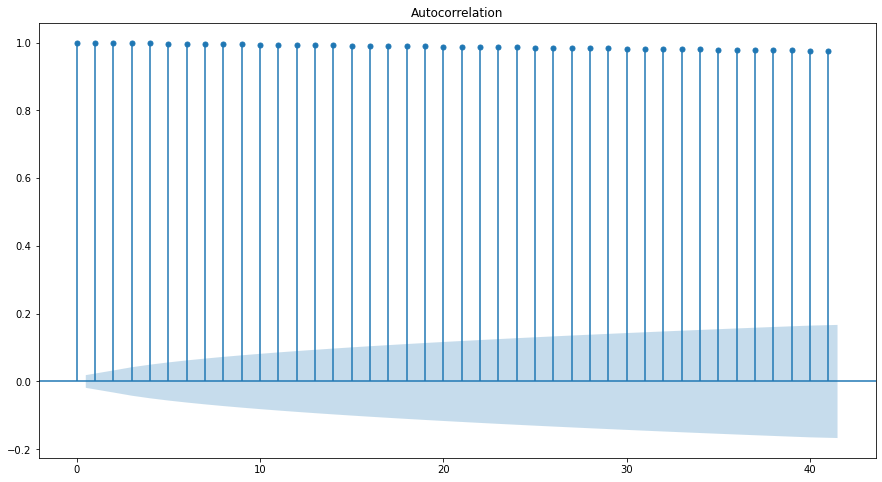

In [33]:
plot_acf(df)
plt.show()

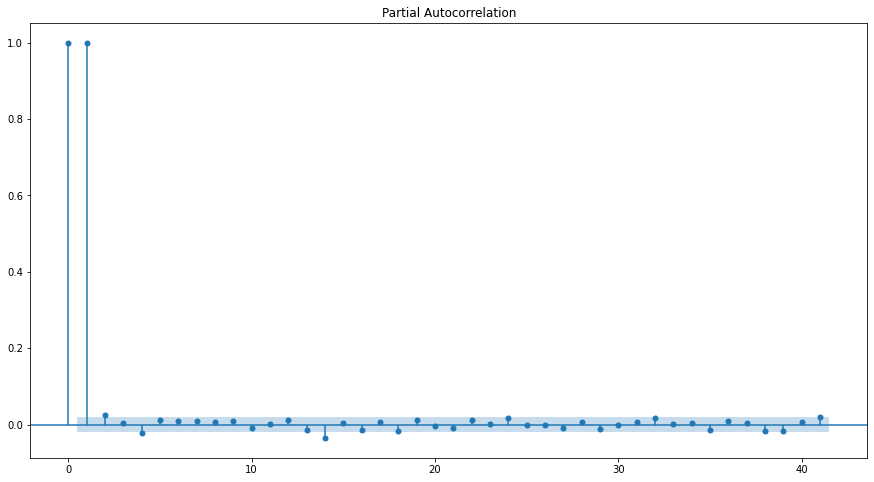

In [34]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [35]:
observations = df.values
df_results = adfuller(observations)
df_results

(0.8479571402405457,
 0.9923721429543915,
 39,
 10861,
 {'1%': -3.4309522324098385,
  '5%': -2.8618061532248067,
  '10%': -2.56691166822869},
 79300.09016648169)

In [243]:
##### Non-stationary series -- proceed with ARIMA & SARIMA model

In [244]:
diff = df.diff(periods=1).dropna()
diff_obs = diff.values
df_results = adfuller(diff_obs)
df_results

(-17.48982726830445,
 4.443054899363683e-30,
 38,
 10861,
 {'1%': -3.4309522324098385,
  '5%': -2.8618061532248067,
  '10%': -2.56691166822869},
 79292.48471555332)

##### ARIMA Model

In [246]:
import itertools

In [247]:
p = q = range(0,5)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
print("Parameter combinations are:")
for i in range(1,len(pdq)):
    print("ARIMA",pdq[i])

Parameter combinations are:
ARIMA (0, 1, 1)
ARIMA (0, 1, 2)
ARIMA (0, 1, 3)
ARIMA (0, 1, 4)
ARIMA (1, 1, 0)
ARIMA (1, 1, 1)
ARIMA (1, 1, 2)
ARIMA (1, 1, 3)
ARIMA (1, 1, 4)
ARIMA (2, 1, 0)
ARIMA (2, 1, 1)
ARIMA (2, 1, 2)
ARIMA (2, 1, 3)
ARIMA (2, 1, 4)
ARIMA (3, 1, 0)
ARIMA (3, 1, 1)
ARIMA (3, 1, 2)
ARIMA (3, 1, 3)
ARIMA (3, 1, 4)
ARIMA (4, 1, 0)
ARIMA (4, 1, 1)
ARIMA (4, 1, 2)
ARIMA (4, 1, 3)
ARIMA (4, 1, 4)


In [248]:
df_score_arima = pd.DataFrame(columns=['param','aic'])
df_score_arima

,param,aic


In [249]:
from warnings import filterwarnings
filterwarnings('ignore')

In [250]:
for param in pdq:
    try:
        model = ARIMA(train,order=param)
        arima_results = model.fit()
        print("ARIMA",param,"AIC:",arima_results.aic)
        df_score_arima = df_score_arima.append({'param':param,'aic':arima_results.aic},ignore_index=True)
    except:
        continue

ARIMA (0, 1, 0) AIC: 70736.00236541001
ARIMA (0, 1, 1) AIC: 70733.54850699255
ARIMA (0, 1, 2) AIC: 70730.59151380746
ARIMA (0, 1, 3) AIC: 70727.80976798058
ARIMA (0, 1, 4) AIC: 70729.41475672687
ARIMA (1, 1, 0) AIC: 70733.75340571809
ARIMA (1, 1, 1) AIC: 70733.69176995568
ARIMA (1, 1, 2) AIC: 70728.01121934067
ARIMA (1, 1, 3) AIC: 70729.5911948228
ARIMA (1, 1, 4) AIC: 70729.08577913522
ARIMA (2, 1, 0) AIC: 70730.24630048328
ARIMA (2, 1, 1) AIC: 70728.09338313826
ARIMA (2, 1, 2) AIC: 70692.80162265536
ARIMA (2, 1, 3) AIC: 70694.62898043012
ARIMA (2, 1, 4) AIC: 70725.90369443841
ARIMA (3, 1, 0) AIC: 70727.70434008466
ARIMA (3, 1, 1) AIC: 70729.54514043372
ARIMA (3, 1, 2) AIC: 70694.64248965346
ARIMA (3, 1, 3) AIC: 70692.6464820406
ARIMA (3, 1, 4) AIC: 70710.32856199951
ARIMA (4, 1, 0) AIC: 70729.42319094884
ARIMA (4, 1, 1) AIC: 70729.25898841042
ARIMA (4, 1, 2) AIC: 70725.68229997423
ARIMA (4, 1, 3) AIC: 70696.04460804207
ARIMA (4, 1, 4) AIC: 70710.11846949607


In [251]:
df_score_arima.sort_values('aic')

,param,aic
18,"(3, 1, 3)",70692.646482
12,"(2, 1, 2)",70692.801623
13,"(2, 1, 3)",70694.628980
17,"(3, 1, 2)",70694.642490
23,"(4, 1, 3)",70696.044608
24,"(4, 1, 4)",70710.118469
19,"(3, 1, 4)",70710.328562
22,"(4, 1, 2)",70725.682300
14,"(2, 1, 4)",70725.903694
15,"(3, 1, 0)",70727.704340


In [262]:
arima_model = ARIMA(train,(3,1,3))
arima_results = arima_model.fit()
print(arima_results.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.USD   No. Observations:                 9800
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -35338.323
Method:                       css-mle   S.D. of innovations              8.909
Date:                Sat, 19 Feb 2022   AIC                          70692.646
Time:                        10:07:08   BIC                          70750.168
Sample:                    01-01-1979   HQIC                         70712.137
                         - 07-22-2016                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1113      0.077      1.453      0.146      -0.039       0.262
ar.L1.D.USD     0.3607      0.026     13.729      0.000       0.309       0.412
ar.L2.D.USD    -0.3780      0.027    -14.011    

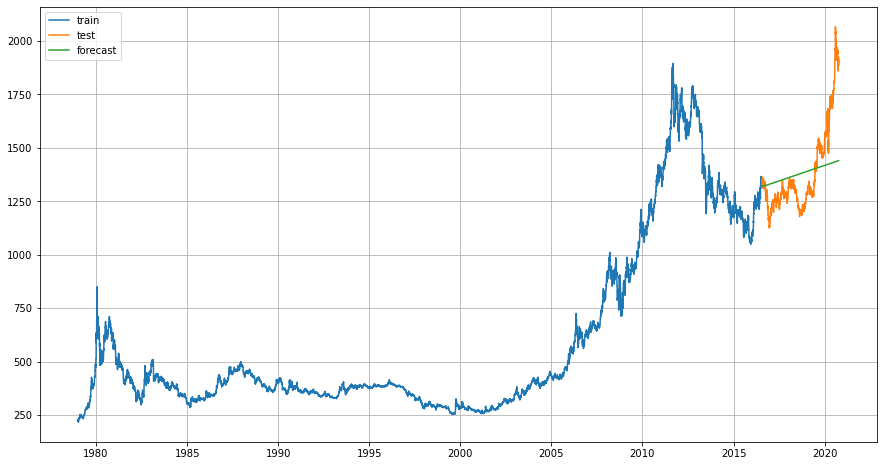

In [263]:
forecasted_values_arima = pd.Series(arima_results.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arima,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [264]:
print("MAE:",MAE(test['USD'],forecasted_values_arima))
print("MAPE:",MAPE(test['USD'],forecasted_values_arima))

MAE: 129.2534506753144
MAPE: 8.860864465850698


##### SARIMA Model

In [265]:
import itertools

In [268]:
p = q = range(0,4)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],4) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [269]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (0, 1, 0) (0, 1, 0, 4) AIC: 77545.90010931545
SARIMAX (0, 1, 0) (0, 1, 1, 4) AIC: 70699.47349302252
SARIMAX (0, 1, 0) (0, 1, 2, 4) AIC: 70675.23232264663
SARIMAX (0, 1, 0) (0, 1, 3, 4) AIC: 70648.18933630374
SARIMAX (0, 1, 0) (1, 1, 0, 4) AIC: 74780.79418542763
SARIMAX (0, 1, 0) (1, 1, 1, 4) AIC: 70701.14928311825
SARIMAX (0, 1, 0) (1, 1, 2, 4) AIC: 70675.71730308933
SARIMAX (0, 1, 0) (1, 1, 3, 4) AIC: 70639.83146061008
SARIMAX (0, 1, 0) (2, 1, 0, 4) AIC: 73461.64087140278
SARIMAX (0, 1, 0) (2, 1, 1, 4) AIC: 70682.04549381425
SARIMAX (0, 1, 0) (2, 1, 2, 4) AIC: 70667.19858771494
SARIMAX (0, 1, 0) (2, 1, 3, 4) AIC: 70641.65215598221
SARIMAX (0, 1, 0) (3, 1, 0, 4) AIC: 72778.59437660348
SARIMAX (0, 1, 0) (3, 1, 1, 4) AIC: 70655.74449818018
SARIMAX (0, 1, 0) (3, 1, 2, 4) AIC: 70648.61542943638
SARIMAX (0, 1, 0) (3, 1, 3, 4) AIC: 70655.18572472491
SARIMAX (0, 1, 1) (0, 1, 0, 4) AIC: 77533.94722131795
SARIMAX (0, 1, 1) (0, 1, 1, 4) AIC: 70690.75603558995
SARIMAX (0, 1, 1) (0, 1, 2, 

SARIMAX (2, 1, 1) (2, 1, 1, 4) AIC: 70661.75407207607
SARIMAX (2, 1, 1) (2, 1, 2, 4) AIC: 70658.91753377768
SARIMAX (2, 1, 1) (2, 1, 3, 4) AIC: 70632.74299901114
SARIMAX (2, 1, 1) (3, 1, 0, 4) AIC: 72284.25420178774
SARIMAX (2, 1, 1) (3, 1, 1, 4) AIC: 70636.43758309487
SARIMAX (2, 1, 1) (3, 1, 2, 4) AIC: 70631.08979671742
SARIMAX (2, 1, 1) (3, 1, 3, 4) AIC: 70689.9653572838
SARIMAX (2, 1, 2) (0, 1, 0, 4) AIC: 74640.77374109124
SARIMAX (2, 1, 2) (0, 1, 1, 4) AIC: 70685.66859375392
SARIMAX (2, 1, 2) (0, 1, 2, 4) AIC: 70648.12463407574
SARIMAX (2, 1, 2) (0, 1, 3, 4) AIC: 70617.00290414477
SARIMAX (2, 1, 2) (1, 1, 0, 4) AIC: 73045.57670493613
SARIMAX (2, 1, 2) (1, 1, 1, 4) AIC: 70674.44140124251
SARIMAX (2, 1, 2) (1, 1, 2, 4) AIC: 70650.33075700808
SARIMAX (2, 1, 2) (1, 1, 3, 4) AIC: 70623.46356250165
SARIMAX (2, 1, 2) (2, 1, 0, 4) AIC: 72251.4998650536
SARIMAX (2, 1, 2) (2, 1, 1, 4) AIC: 70651.11827315913
SARIMAX (2, 1, 2) (2, 1, 2, 4) AIC: 70648.28117827834
SARIMAX (2, 1, 2) (2, 1, 3, 4)

In [270]:
df_score.sort_values('aic')

,param,seasonal,aic
119,"(1, 1, 3)","(1, 1, 3, 4)",70616.853099
163,"(2, 1, 2)","(0, 1, 3, 4)",70617.002904
247,"(3, 1, 3)","(1, 1, 3, 4)",70617.149259
183,"(2, 1, 3)","(1, 1, 3, 4)",70618.172401
55,"(0, 1, 3)","(1, 1, 3, 4)",70622.251366
...,...,...,...
192,"(3, 1, 0)","(0, 1, 0, 4)",77514.696281
16,"(0, 1, 1)","(0, 1, 0, 4)",77533.947221
128,"(2, 1, 0)","(0, 1, 0, 4)",77535.698925
64,"(1, 1, 0)","(0, 1, 0, 4)",77540.988336


In [281]:
model = SARIMAX(train,
                       order = (1,1,3),
                       seasonal_order = (1,1,3,4),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()

In [282]:
print(sarimax_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                               USD   No. Observations:                 9801
Model:             SARIMAX(1, 1, 3)x(1, 1, 3, 4)   Log Likelihood              -35299.427
Date:                           Sat, 19 Feb 2022   AIC                          70616.853
Time:                                   12:43:37   BIC                          70681.546
Sample:                               12-29-1978   HQIC                         70638.775
                                    - 07-22-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       3.562e-05      5.353   6.65e-06      1.000     -10.491      10.491
ma.L1         -0.0194      5.352     -0.004

In [283]:
forecast = sarimax_results.forecast(len(test))

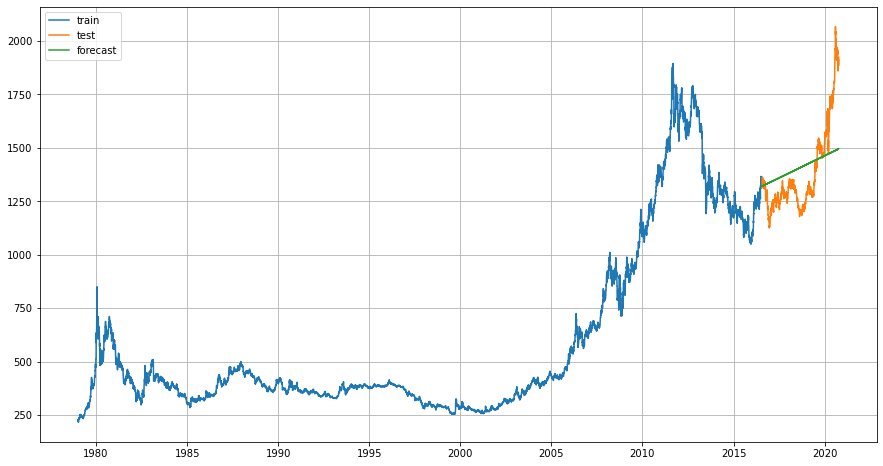

In [284]:
# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [285]:
print("MAE",MAE(test['USD'],forecast))
print("MAPE",MAPE(test['USD'],forecast))

MAE 130.35046465359534
MAPE 9.187469516150134


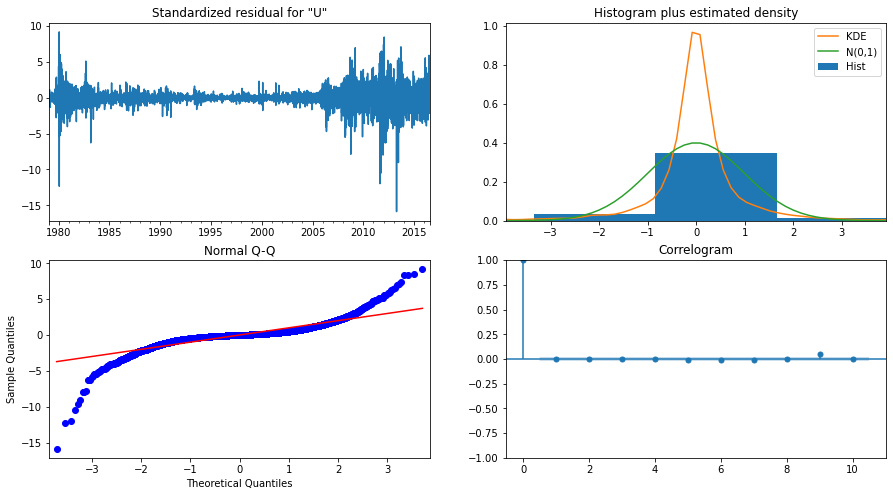

In [286]:
sarimax_results.plot_diagnostics();

# ARCH/GARCH Model

In [36]:
df

,USD
time_stamp,
1978-12-29,226.0
1979-01-01,226.0
1979-01-02,226.8
1979-01-03,218.6
1979-01-04,223.2
...,...
2020-10-05,1909.6
2020-10-06,1913.4
2020-10-07,1884.5


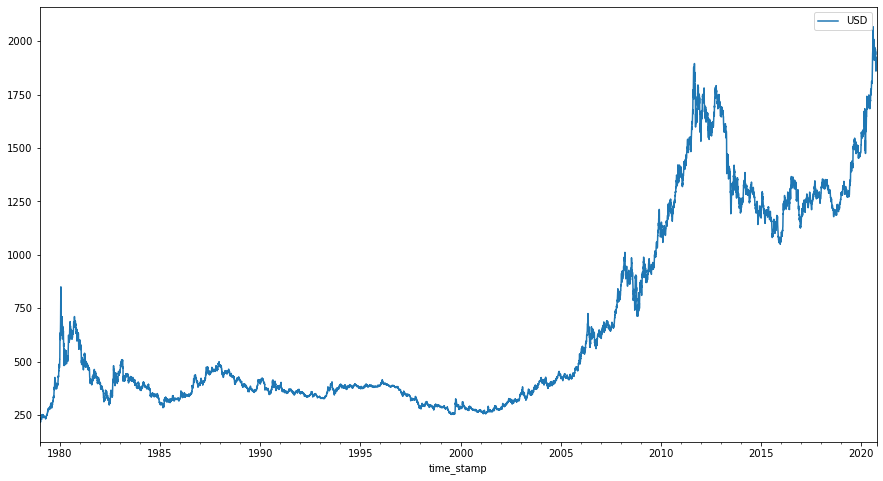

In [37]:
df.plot()
plt.show()

In [43]:
TES = ExponentialSmoothing(df,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
TES_model = TES.fit(smoothing_level=0.9596429,
                   smoothing_trend=0.0000952729,
                   smoothing_seasonal=0.090714)
TES_model.summary()

Dep. Variable:,USD,No. Observations:,10901
Model:,ExponentialSmoothing,SSE,1011282.661
Optimized:,True,AIC,49400.841
Trend:,Multiplicative,BIC,49466.510
Seasonal:,Multiplicative,AICC,49400.865
Seasonal Periods:,5,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,13:47:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9596429,alpha,False
smoothing_trend,9.5273e-05,beta,False


In [44]:
resid = TES_model.resid

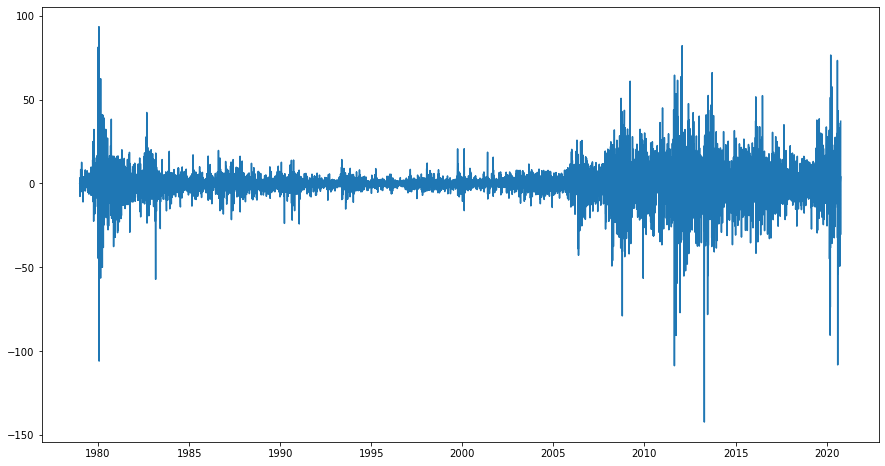

In [45]:
plt.plot(resid)
plt.show()

In [46]:
resid_df = pd.DataFrame(resid,columns=['residuals'])
resid_df.shape

(10901, 1)

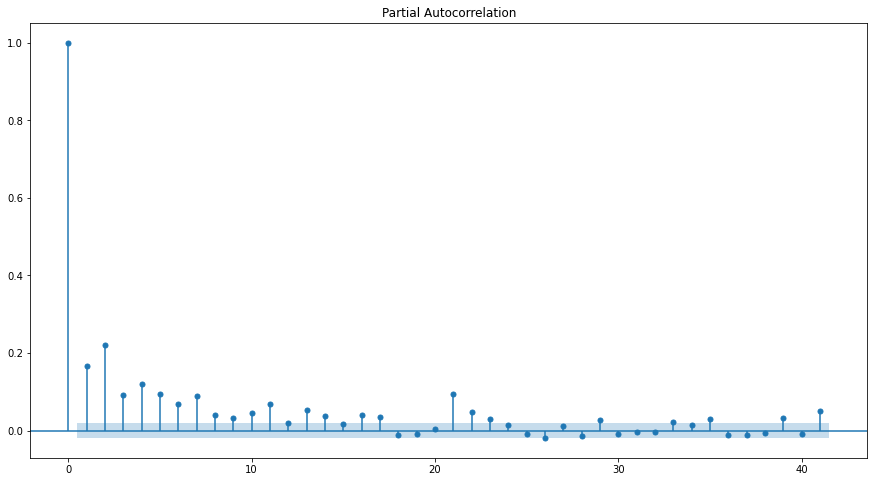

In [47]:
plot_pacf(resid_df**2)
plt.show()

##### ARCH - 1 Model

In [48]:
model_1 = arch_model(resid_df,p=1,q=0)
model_fit_1 = model_1.fit(disp='off')
model_fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -38795.8
Distribution:                  Normal   AIC:                           77597.6
Method:            Maximum Likelihood   BIC:                           77619.5
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        13:49:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2536      0.118      2.158  3.090e-02 [2.332e-02,  0.484]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         41.3155      3.068     13.469  2.395e-41 [ 35.303, 47.328]
alpha[1]       1.0000      0.144      6.951  3.635e-12 [  0.718,  1.282]
========================================================================

Covariance estimator: robust
"""

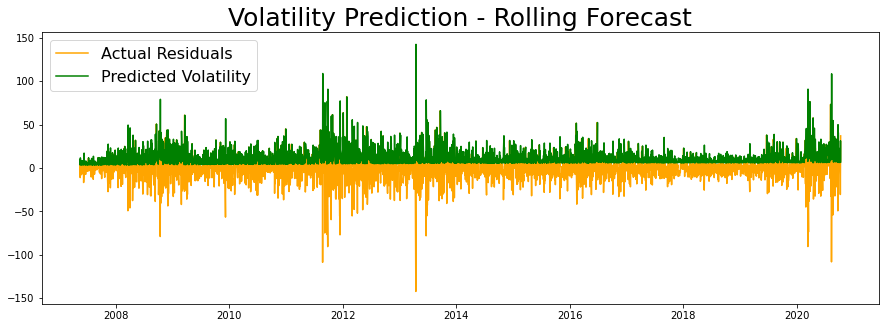

In [50]:
rolling_predictions = []
test_size = 3500

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 2 Model

In [51]:
model_2 = arch_model(resid_df,p=2,q=0)
model_fit_2 = model_2.fit(disp='off')
model_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -37535.4
Distribution:                  Normal   AIC:                           75078.8
Method:            Maximum Likelihood   BIC:                           75108.0
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:02:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1506  8.551e-02      1.762  7.815e-02 [-1.697e-02,  0.318]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         22.7508      2.312      9.838  7.704e-23 [ 18.218, 27.283]
alpha[1]       0.4520  5.447e-02      8.299  1.052e-16 [  0.345,  0.559]
alpha[2]       0.5480  5.763e-02      9.509  1.930e-21 [  0.435,  0.661]
========================================================================

Covariance estimator: robust
"""

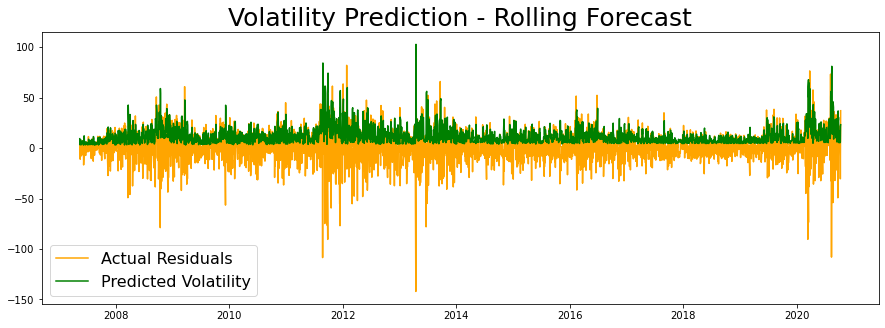

In [53]:
rolling_predictions = []
test_size = 3500

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 3 Model

In [54]:
model_3 = arch_model(resid_df,p=3,q=0)
model_fit_3 = model_3.fit(disp='off')
model_fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -36584.9
Distribution:                  Normal   AIC:                           73179.9
Method:            Maximum Likelihood   BIC:                           73216.3
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:07:55   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0913  7.633e-02      1.196      0.232 [-5.832e-02,  0.241]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         13.0109      1.570      8.289  1.144e-16 [  9.934, 16.087]
alpha[1]       0.3324  4.415e-02      7.529  5.103e-14 [  0.246,  0.419]
alpha[2]       0.3215  3.338e-02      9.633  5.789e-22 [  0.256,  0.387]
alpha[3]       0.3461  3.337e-02     10.369  3.419e-25 [  0.281,  0.411]
========================================================================

Covariance estimator: robust
"""

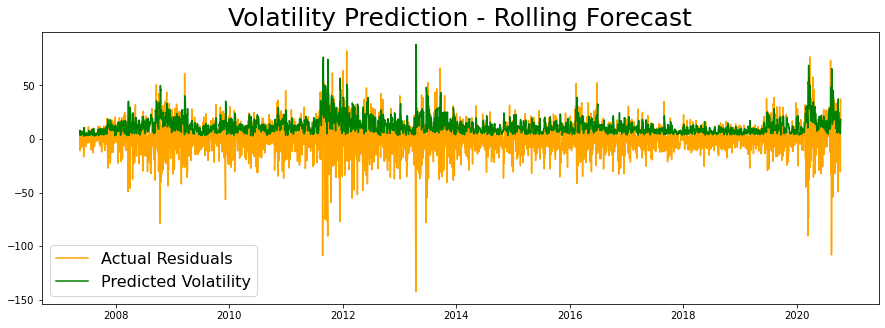

In [55]:
rolling_predictions = []
test_size = 3500

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 4 Model

In [56]:
model_4 = arch_model(resid_df,p=4,q=0)
model_fit_4 = model_4.fit(disp='off')
model_fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -35790.5
Distribution:                  Normal   AIC:                           71593.0
Method:            Maximum Likelihood   BIC:                           71636.7
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:17:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         8.5230e-03  5.863e-02      0.145      0.884 [ -0.106,  0.123]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          7.8434      0.876      8.949  3.597e-19 [  6.126,  9.561]
alpha[1]       0.2414  3.017e-02      8.002  1.224e-15 [  0.182,  0.301]
alpha[2]       0.2174  2.252e-02      9.651  4.886e-22 [  0.173,  0.262]
alpha[3]       0.2250  2.363e-02      9.521  1.708e-21 [  0.179,  0.271]
alpha[4]       0.3162  3.477e-02      9.096  9.389e-20 [  0.248,  0.384]
========================================================================

Covariance estimator: robust
"""

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


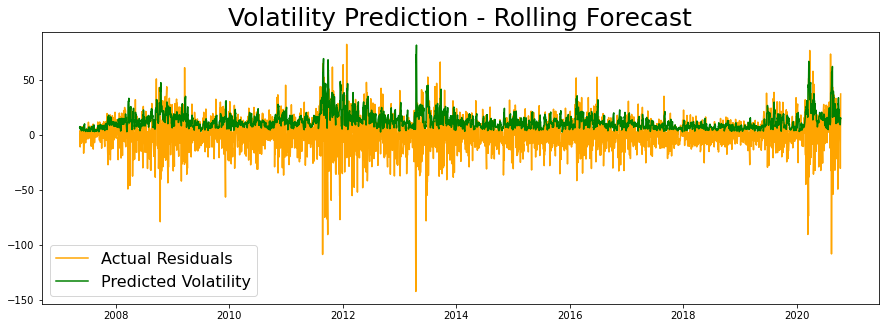

In [57]:
rolling_predictions = []
test_size = 3500

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=4, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 5 Model

In [58]:
model_5 = arch_model(resid_df,p=5,q=0)
model_fit_5 = model_5.fit(disp='off')
model_fit_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -35200.0
Distribution:                  Normal   AIC:                           70414.0
Method:            Maximum Likelihood   BIC:                           70465.1
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:27:32   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0147  4.280e-02      0.343      0.732 [-6.923e-02,9.856e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          5.0492      0.517      9.771  1.502e-22 [  4.036,  6.062]
alpha[1]       0.1768  2.813e-02      6.286  3.254e-10 [  0.122,  0.232]
alpha[2]       0.1678  1.813e-02      9.251  2.214e-20 [  0.132,  0.203]
alpha[3]       0.1972  2.034e-02      9.694  3.188e-22 [  0.157,  0.237]
alpha[4]       0.2195  2.012e-02     10.912  1.008e-27 [  0.180,  0.259]
alpha[5]       0.2387  2.416e-02      9.883  4.948e-23 [  0.191,  0.286]
========================================================================

Covariance estimator: robust
"""

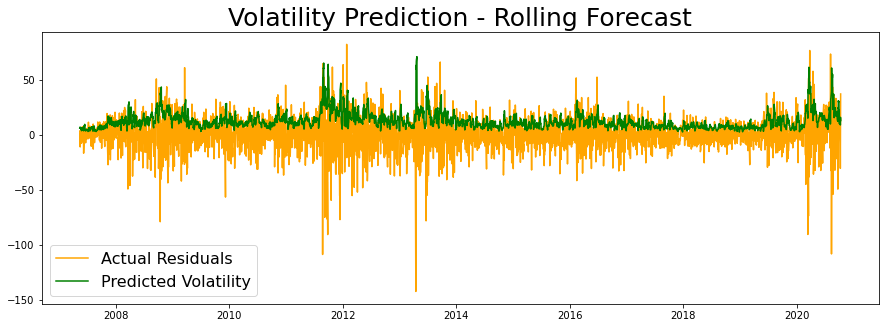

In [59]:
rolling_predictions = []
test_size = 3500

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=5, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 6 Model

In [60]:
model_6 = arch_model(resid_df,p=6,q=0)
model_fit_6 = model_6.fit(disp='off')
model_fit_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -34956.2
Distribution:                  Normal   AIC:                           69928.4
Method:            Maximum Likelihood   BIC:                           69986.7
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:37:09   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0292  4.142e-02     -0.706      0.480 [ -0.110,5.195e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.1219      0.447      9.227  2.775e-20   [  3.246,  4.997]
alpha[1]       0.1366  2.120e-02      6.442  1.181e-10 [9.502e-02,  0.178]
alpha[2]       0.1370  1.729e-02      7.922  2.333e-15   [  0.103,  0.171]
alpha[3]       0.1746  2.019e-02      8.649  5.197e-18   [  0.135,  0.214]
alpha[4]       0.1919  1.837e-02     10.448  1.495e-25   [  0.156,  0.228]
alpha[5]       0.2067  2.469e-02      8.370  5.750e-17   [  0.158,  0.255]
alpha[6]       0.1532  1.917e-02      7.993  1.317e-15   [  0.116,  0.191]
==========================================================================

Covariance estimator: robust
"""

##### ARCH - 7 Model

In [64]:
model_7 = arch_model(resid_df,p=7,q=0)
model_fit_7 = model_7.fit(disp='off')
model_fit_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -34674.3
Distribution:                  Normal   AIC:                           69366.6
Method:            Maximum Likelihood   BIC:                           69432.2
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:38:12   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0570  3.688e-02     -1.546      0.122 [ -0.129,1.525e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.3877      0.370      9.149  5.749e-20   [  2.662,  4.113]
alpha[1]       0.0934  1.552e-02      6.016  1.791e-09 [6.295e-02,  0.124]
alpha[2]       0.1147  1.633e-02      7.024  2.162e-12 [8.267e-02,  0.147]
alpha[3]       0.1557  2.000e-02      7.782  7.120e-15   [  0.116,  0.195]
alpha[4]       0.1789  1.800e-02      9.941  2.754e-23   [  0.144,  0.214]
alpha[5]       0.1659  2.038e-02      8.142  3.872e-16   [  0.126,  0.206]
alpha[6]       0.1216  1.616e-02      7.529  5.119e-14 [8.998e-02,  0.153]
alpha[7]       0.1699  1.997e-02      8.507  1.790e-17   [  0.131,  0.209]
==========================================================================

Covariance estimator: robust
"""

##### ARCH - 8 Model

In [67]:
model_8 = arch_model(resid_df,p=8,q=0)
model_fit_8 = model_8.fit(disp='off')
model_fit_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -34583.6
Distribution:                  Normal   AIC:                           69187.2
Method:            Maximum Likelihood   BIC:                           69260.1
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:39:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0503  3.591e-02     -1.401      0.161 [ -0.121,2.009e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.0362      0.349      8.691  3.590e-18   [  2.352,  3.721]
alpha[1]       0.0929  1.645e-02      5.649  1.616e-08 [6.069e-02,  0.125]
alpha[2]       0.1039  1.635e-02      6.354  2.097e-10 [7.184e-02,  0.136]
alpha[3]       0.1377  2.005e-02      6.867  6.543e-12 [9.837e-02,  0.177]
alpha[4]       0.1622  1.808e-02      8.972  2.921e-19   [  0.127,  0.198]
alpha[5]       0.1480  1.960e-02      7.552  4.280e-14   [  0.110,  0.186]
alpha[6]       0.1040  1.497e-02      6.950  3.654e-12 [7.470e-02,  0.133]
alpha[7]       0.1528  1.988e-02      7.689  1.482e-14   [  0.114,  0.192]
alpha[8]       0.0984  1.647e-02      5.974  2.318e-09 [6.611e-02,  0.131]
==========================================================================

Covariance estimator: robust
"""

##### ARCH - 9 Model

In [89]:
model_9 = arch_model(resid_df,p=9,q=0)
model_fit_9 = model_9.fit(disp='off')
model_fit_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -34423.2
Distribution:                  Normal   AIC:                           68868.3
Method:            Maximum Likelihood   BIC:                           68948.6
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:57:42   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0517  3.557e-02     -1.453      0.146 [ -0.121,1.802e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.6182      0.307      8.534  1.419e-17   [  2.017,  3.220]
alpha[1]       0.0898  1.626e-02      5.522  3.354e-08 [5.793e-02,  0.122]
alpha[2]       0.0890  1.501e-02      5.927  3.083e-09 [5.954e-02,  0.118]
alpha[3]       0.1231  1.915e-02      6.429  1.282e-10 [8.558e-02,  0.161]
alpha[4]       0.1493  1.734e-02      8.608  7.406e-18   [  0.115,  0.183]
alpha[5]       0.1233  1.663e-02      7.414  1.227e-13 [9.067e-02,  0.156]
alpha[6]       0.0852  1.406e-02      6.061  1.354e-09 [5.765e-02,  0.113]
alpha[7]       0.1363  1.859e-02      7.327  2.346e-13 [9.981e-02,  0.173]
alpha[8]       0.0836  1.470e-02      5.684  1.316e-08 [5.476e-02,  0.112]
alpha[9]       0.1205  1.959e-02      6.154  7.553e-10 [8.215e-02,  0.159]
==========================================================================

Covariance estimator: robust
"""

##### ARCH - 17 Model

In [90]:
model_9 = arch_model(resid_df,p=17,q=0)
model_fit_9 = model_9.fit(disp='off')
model_fit_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -34120.2
Distribution:                  Normal   AIC:                           68278.5
Method:            Maximum Likelihood   BIC:                           68417.1
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:58:07   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0409  3.427e-02     -1.193      0.233 [ -0.108,2.629e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          1.6911      0.274      6.173  6.710e-10     [  1.154,  2.228]
alpha[1]       0.0941  2.106e-02      4.467  7.940e-06   [5.280e-02,  0.135]
alpha[2]       0.0574  1.308e-02      4.390  1.132e-05 [3.180e-02,8.309e-02]
alpha[3]       0.0925  2.069e-02      4.473  7.724e-06   [5.198e-02,  0.133]
alpha[4]       0.1023  1.620e-02      6.317  2.670e-10   [7.058e-02,  0.134]
alpha[5]       0.0646  1.371e-02      4.709  2.484e-06 [3.769e-02,9.143e-02]
alpha[6]       0.0488  1.311e-02      3.719  2.001e-04 [2.306e-02,7.446e-02]
alpha[7]       0.0769  1.837e-02      4.187  2.829e-05   [4.090e-02,  0.113]
alpha[8]       0.0363  1.203e-02      3.019  2.538e-03 [1.273e-02,5.987e-02]
alpha[9]       0.0654  1.481e-02      4.418  9.972e-06 [3.639e-02,9.444e-02]
alpha[10]      0.0540  1.404e-02      3.848  1.193e-04 [2.650e-02,8.152e-02]
alpha[11]      0.0234  1.114e-02      2.101  3.562e-02 [1.573e-03,4.524e-02]
alpha[12]      0.0338  1.214e-02      2.782  5.404e-03 [9.982e-03,5.759e-02]
alpha[13]      0.0417  1.276e-02      3.272  1.069e-03 [1.674e-02,6.675e-02]
alpha[14]      0.0400  1.345e-02      2.974  2.939e-03 [1.364e-02,6.638e-02]
alpha[15]      0.0623  1.664e-02      3.747  1.793e-04 [2.973e-02,9.495e-02]
alpha[16]      0.0607  1.264e-02      4.807  1.532e-06 [3.598e-02,8.552e-02]
alpha[17]      0.0456  1.414e-02      3.228  1.248e-03 [1.792e-02,7.333e-02]
============================================================================

Covariance estimator: robust
"""

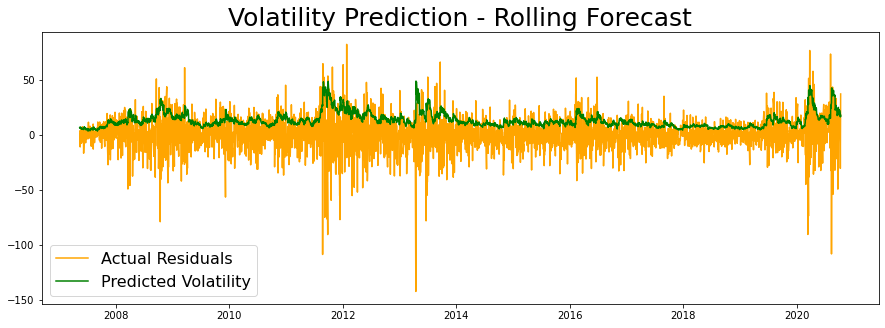

In [91]:
rolling_predictions = []
test_size = 3500

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=17, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 18 Model

In [88]:
model_9 = arch_model(resid_df,p=18,q=0)
model_fit_9 = model_9.fit(disp='off')
model_fit_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -34116.7
Distribution:                  Normal   AIC:                           68273.4
Method:            Maximum Likelihood   BIC:                           68419.3
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:57:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0434  3.424e-02     -1.268      0.205 [ -0.111,2.371e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.6621      0.275      6.034  1.595e-09      [  1.122,  2.202]
alpha[1]       0.0951  2.137e-02      4.450  8.600e-06    [5.319e-02,  0.137]
alpha[2]       0.0577  1.317e-02      4.382  1.177e-05  [3.189e-02,8.352e-02]
alpha[3]       0.0918  2.097e-02      4.377  1.202e-05    [5.068e-02,  0.133]
alpha[4]       0.1025  1.622e-02      6.316  2.677e-10    [7.066e-02,  0.134]
alpha[5]       0.0621  1.371e-02      4.528  5.952e-06  [3.522e-02,8.897e-02]
alpha[6]       0.0488  1.334e-02      3.655  2.572e-04  [2.262e-02,7.492e-02]
alpha[7]       0.0737  1.792e-02      4.115  3.877e-05    [3.861e-02,  0.109]
alpha[8]       0.0360  1.202e-02      2.995  2.747e-03  [1.243e-02,5.954e-02]
alpha[9]       0.0629  1.459e-02      4.313  1.614e-05  [3.433e-02,9.154e-02]
alpha[10]      0.0535  1.410e-02      3.795  1.477e-04  [2.588e-02,8.116e-02]
alpha[11]      0.0221  1.109e-02      1.994  4.615e-02  [3.776e-04,4.384e-02]
alpha[12]      0.0316  1.213e-02      2.605  9.190e-03  [7.825e-03,5.539e-02]
alpha[13]      0.0392  1.306e-02      2.999  2.704e-03  [1.357e-02,6.476e-02]
alpha[14]      0.0400  1.338e-02      2.990  2.789e-03  [1.378e-02,6.622e-02]
alpha[15]      0.0593  1.659e-02      3.576  3.487e-04  [2.682e-02,9.187e-02]
alpha[16]      0.0596  1.281e-02      4.654  3.258e-06  [3.450e-02,8.471e-02]
alpha[17]      0.0438  1.396e-02      3.141  1.684e-03  [1.648e-02,7.119e-02]
alpha[18]      0.0203  1.391e-02      1.460      0.144 [-6.959e-03,4.756e-02]
=============================================================================

Covariance estimator: robust
"""

##### GARCH - (1,1) Model

In [69]:
model_10 = arch_model(resid_df,p=1,q=1)
model_fit_10 = model_10.fit(disp='off')
model_fit_10.summary()

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -33997.1
Distribution:                  Normal   AIC:                           68002.1
Method:            Maximum Likelihood   BIC:                           68031.3
                                        No. Observations:                10901
Date:                Fri, Apr 01 2022   Df Residuals:                    10900
Time:                        14:45:04   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0541  3.090e-02     -1.752  7.971e-02 [ -0.115,6.415e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0578  2.011e-02      2.876  4.030e-03 [1.842e-02,9.725e-02]
alpha[1]       0.0630  9.010e-03      6.988  2.794e-12 [4.530e-02,8.062e-02]
beta[1]        0.9371  8.898e-03    105.307      0.000     [  0.920,  0.955]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\python\lib\site-pac

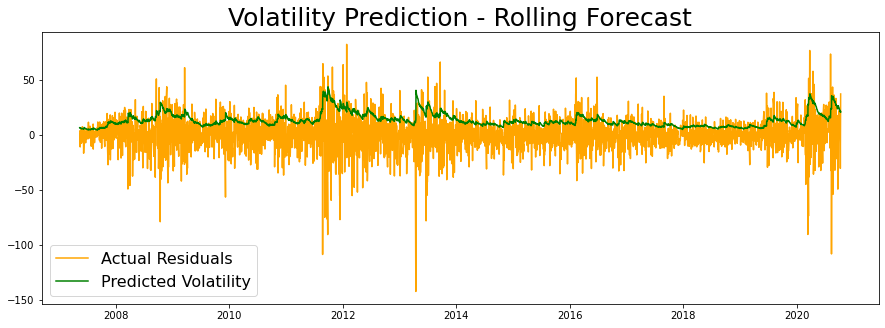

In [70]:
rolling_predictions = []
test_size = 3500

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

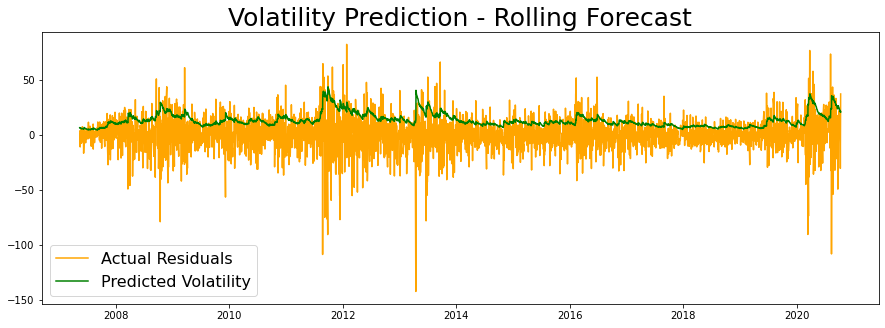

In [71]:
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

# Future Predictions

##### ARCH - 1 Prediction

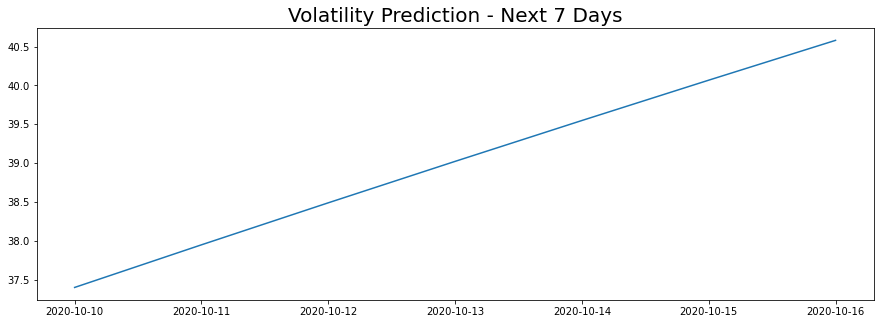

In [72]:
final_df = resid_df
final_model = arch_model(final_df, p=1, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 2 Prediction

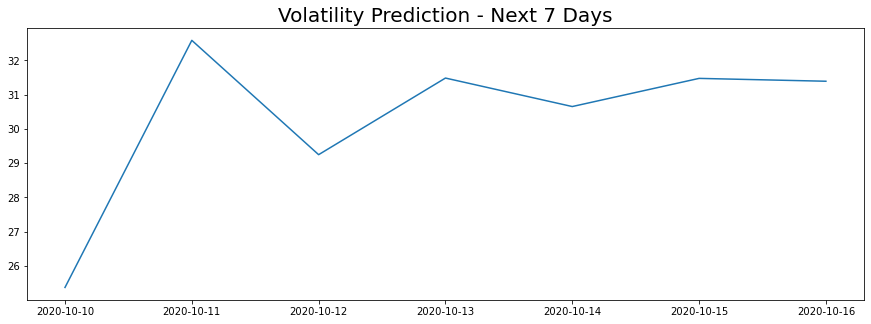

In [73]:
final_df = resid_df
final_model = arch_model(final_df, p=2, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 3 Prediction

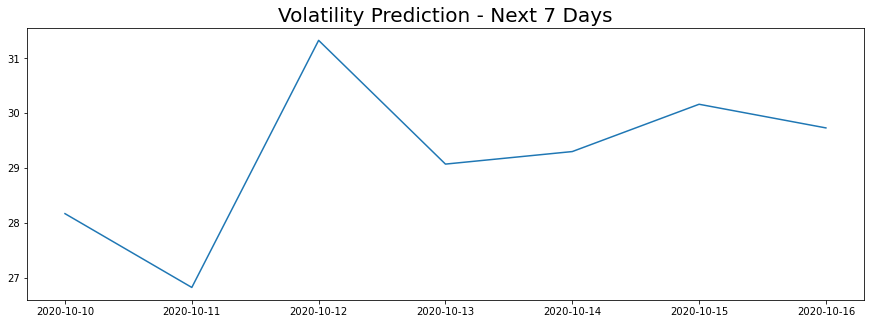

In [74]:
final_df = resid_df
final_model = arch_model(final_df, p=3, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 4 Prediction

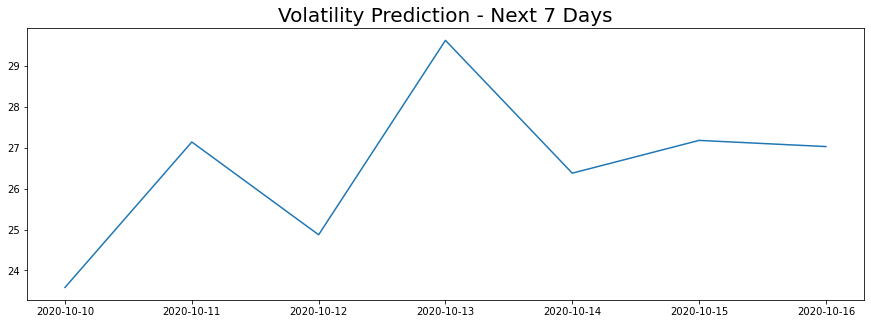

In [75]:
final_df = resid_df
final_model = arch_model(final_df, p=4, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 5 Prediction

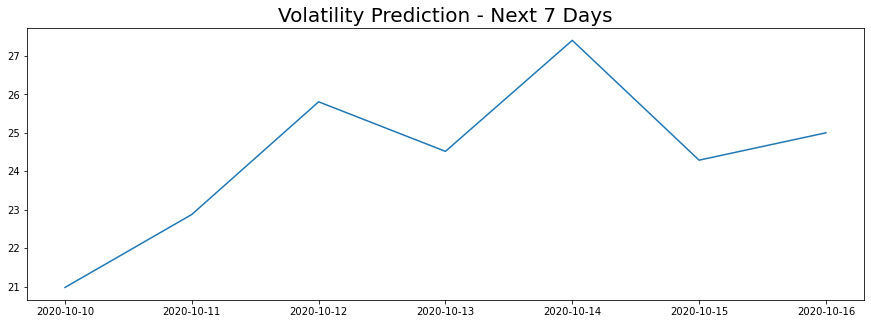

In [76]:
final_df = resid_df
final_model = arch_model(final_df, p=5, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 17 Prediction

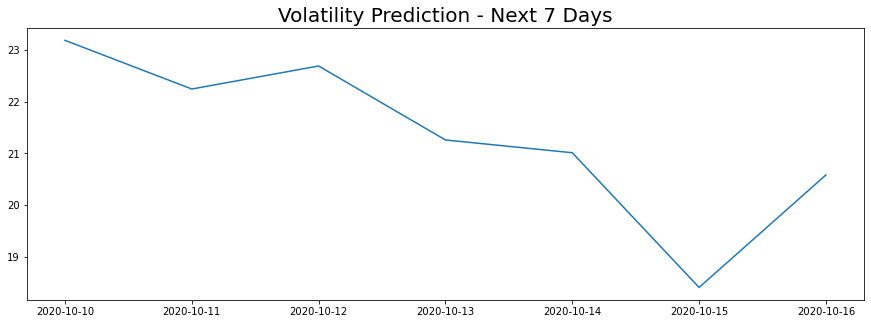

In [92]:
final_df = resid_df
final_model = arch_model(final_df, p=17, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### GARCH (1,1) Prediction

C:\Users\python\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


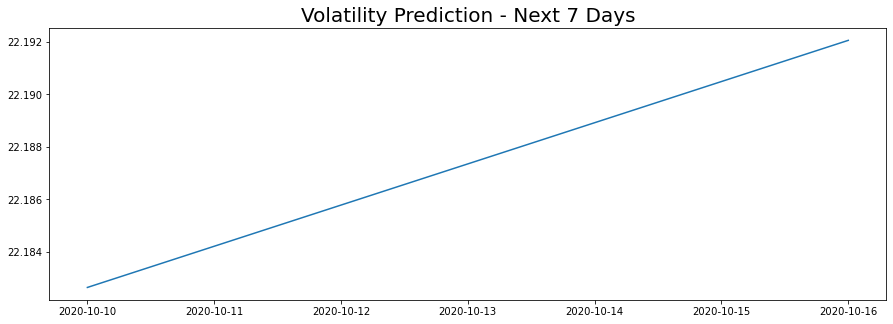

In [77]:
final_df = resid_df
final_model = arch_model(final_df, p=1, q=1)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### Conclusion:

- Based on the significance of the model parameters and the AIC Score, we can conclude that the ARCH - 17 Model is the best fit model and the future predictions can be done using this model.